In [72]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import os

In [73]:
df = pd.read_csv("House_Rent_Dataset.csv")
df = df.drop(columns=['Posted On'])
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [74]:
#df.hist(bins=50 ,figsize=(20,15))
#plt.show()

In [75]:
objects = df.select_dtypes(include='object').columns
for i in range(0,len(objects)):
    print(df[objects[i]].value_counts())
    print('*************************************************')

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64
*************************************************
Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64
*************************************************
Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad            

In [76]:
df = df.loc[df['Point of Contact'] != 'Contact Builder']
df = df.loc[df['Area Type'] != 'Built Area']

In [77]:
Area_Type =  {'Carpet Area':0, 'Super Area':1}
df['Area Type'] = df['Area Type'].replace(Area_Type)

City =  {'Kolkata':0, 'Hyderabad':1, 'Bangalore':2, 'Chennai':3, 'Delhi':4, 'Mumbai':5}
df['City'] = df['City'].replace(City)

Furnishing_Status =  {'Unfurnished':0, 'Semi-Furnished':1, 'Furnished':2}
df['Furnishing Status'] = df['Furnishing Status'].replace(Furnishing_Status)

Tenant_Preferred =  {'Family':0, 'Bachelors':1, 'Bachelors/Family':2}
df['Tenant Preferred'] = df['Tenant Preferred'].replace(Tenant_Preferred)

Point_of_Contact =  {'Contact Owner':0, 'Contact Agent':1}
df['Point of Contact'] = df['Point of Contact'].replace(Point_of_Contact)

In [78]:
objects = df.select_dtypes(include='object').columns
for i in range(0,len(objects)):
    print(df[objects[i]].value_counts())
    print('*************************************************')

Floor
1 out of 2         377
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64
*************************************************
Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2234, dtype: int64
*************************************************


In [79]:
le = preprocessing.LabelEncoder()

for i in range(0,len(objects)):
    df[objects[i]] = le.fit_transform(df[objects[i]])

In [80]:
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,455,1,221,0,0,2,2,0
1,2,20000,800,14,1,1527,0,1,2,1,0
2,2,17000,1000,14,1,1760,0,1,2,1,0
3,2,10000,800,10,1,526,0,0,2,1,0
4,2,7500,850,10,0,1889,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,271,0,219,1,1,2,2,0
4742,3,29000,2000,16,1,1214,1,1,2,3,0
4743,3,35000,1750,271,0,724,1,1,2,3,1
4744,3,45000,1500,226,0,590,1,1,0,2,1


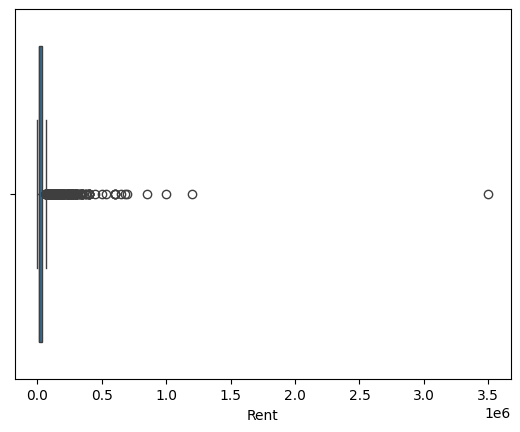

In [81]:
#DELETE OUTLIERS
sns.boxplot(x=df['Rent']);

In [82]:
df.drop(df[(df['Rent'] > 500000)].index, inplace=True)


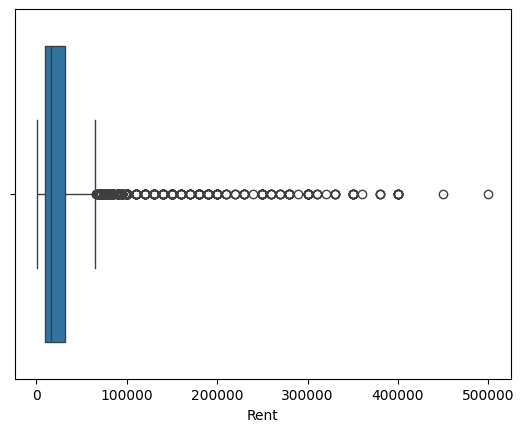

In [83]:
sns.boxplot(x=df['Rent']);

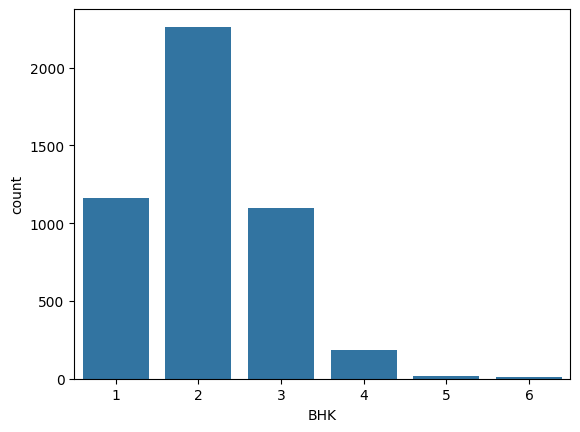

In [84]:
sns.countplot(x=df['BHK']);

In [85]:
df['BHK'].value_counts()

BHK
2    2263
1    1165
3    1097
4     182
5      16
6       8
Name: count, dtype: int64

In [86]:
df.drop(df[(df['BHK'] > 4)].index, inplace=True)

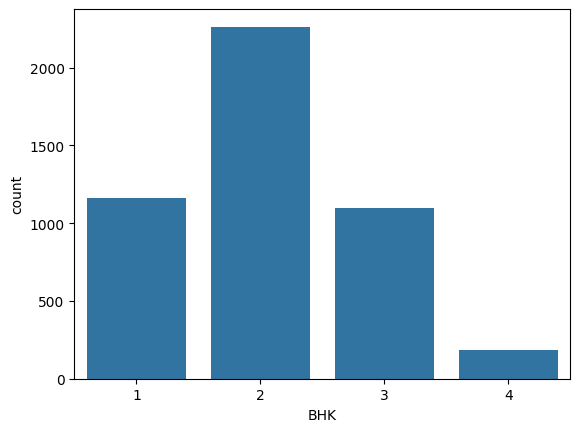

In [87]:
sns.countplot(x=df['BHK']);

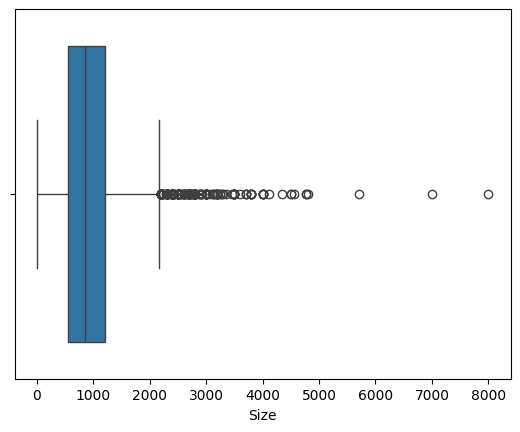

In [88]:
sns.boxplot(x=df['Size']);

In [89]:
len(df[(df['Size'] < 60) | (df['Size'] > 2500)])

138

In [90]:
df.drop(df[(df['Size'] < 60) | (df['Size'] > 2500)].index, inplace=True)

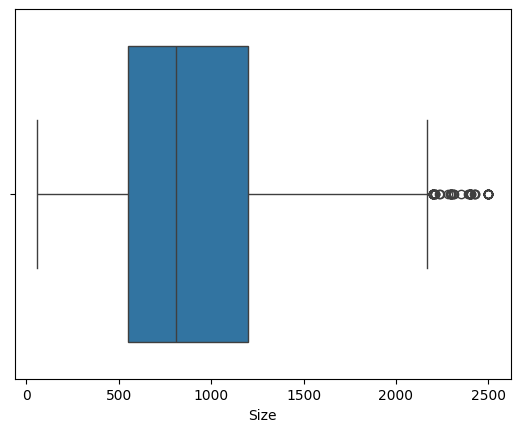

In [91]:
sns.boxplot(x=df['Size']);

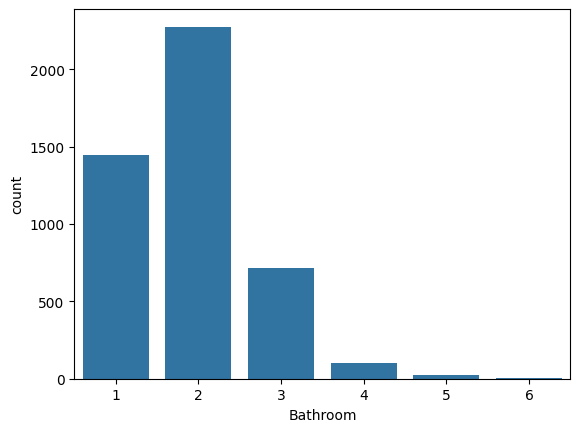

In [92]:
sns.countplot(x=df['Bathroom']);

In [93]:
df.drop(df[(df['Bathroom'] == 6) | (df['Bathroom'] == 5)].index, inplace=True)

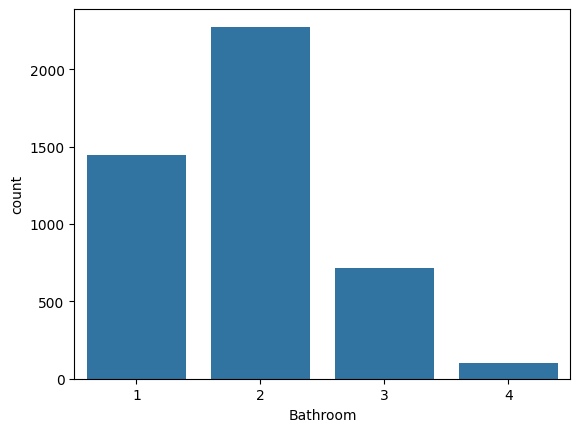

In [94]:
sns.countplot(x=df['Bathroom']);

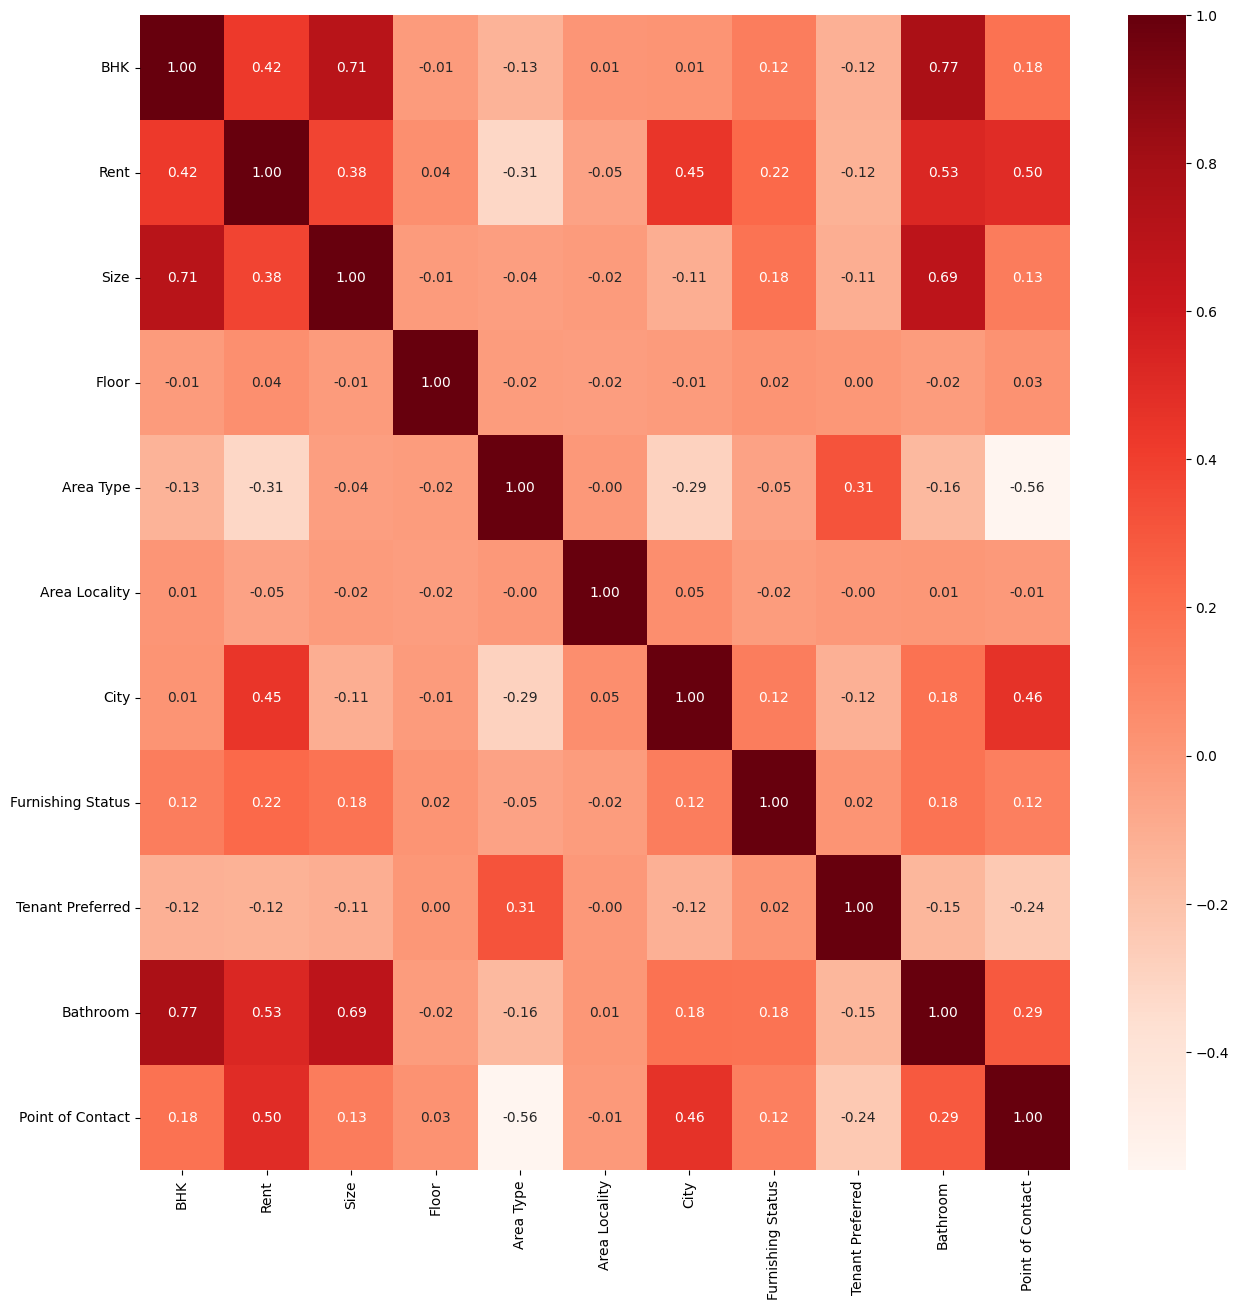

In [95]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')
plt.show()

In [96]:
X = df.drop(columns=['Rent'])
y = df['Rent']

In [97]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=44)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5, shuffle=True, random_state=44)

In [98]:
LR = LinearRegression()
LR.fit(X_train, y_train)
print('LinearRegression Train Score is : ' , LR.score(X_train, y_train))
print('LinearRegression Test Score is : ' , LR.score(X_test, y_test))

LinearRegression Train Score is :  0.4839808399234149
LinearRegression Test Score is :  0.5100307017319837


In [99]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=0)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.8250945015737083
Random Forest Regressor Test Score is :  0.8043671746405128


In [101]:
#enregistrement du modele
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(RandomForestRegressorModel, f)